In [19]:
# standard libraries
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append("..")
import helper.helper as h
import helper.methods as m

from importlib import reload  # Python 3.4+

In [40]:
# reload helper and methods for when things change
reload(m);
reload(h);

True W:
[[ 0.33  0.    0.    0.    0.  ]
 [-0.68  0.4   0.    0.    0.  ]
 [ 0.    0.    0.44  0.    0.  ]
 [ 0.    0.61 -0.29  0.    0.  ]
 [ 0.58 -0.31  0.46  0.    0.32]].



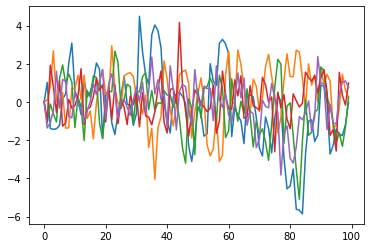

In [41]:
## Number of dimensions, number of edges, number of samples
T, n, s = 100, 5, 10

### Coefficient matrix
## First approach: A is a DAG, no model mismatch
A_true = h.generate_A(n, s, tril = False, low = 0.25, high = 0.75)

## Second approach: A is not necessarily a DAG, possible model mismatch
# A_true = (np.array([0.0] * (n ** 2 - s) + [1.0] * s) * (2 * np.random.randint(0, 2, size=(n ** 2)) - 1) * np.random.uniform(low = 0.45, high = 0.55, size = n ** 2))

# shuffle for randomness
# np.random.shuffle(A_true)

# reshape
# A_true = A_true.reshape(n, n)

# set coefficients to be positive (else oscillating which does not make sense)
for i in range(len(A_true)):
    A_true[i][i] = np.abs(A_true[i][i])

## True permutation
P_true = np.identity(n) # np.random.permutation(np.identity(n))

## Datagenerating W
W_true = P_true.T @ A_true @ P_true
print(f"True W:\n{np.round(W_true, 2)}.\n")

## Generate series
X = h.generate_var_2(T, n, A_true, P_true)
plt.plot(X);

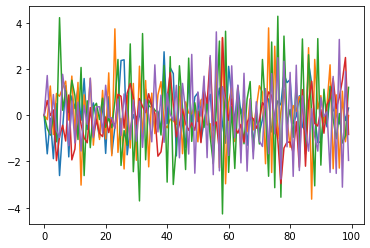

[[ 0.   -0.47 -0.34  0.    0.  ]
 [ 0.   -0.64  0.67  0.    0.  ]
 [ 0.    0.   -0.52  0.    0.  ]
 [ 0.   -0.41 -0.38  0.31  0.  ]
 [ 0.    0.    0.   -0.3  -0.74]]
Dataset saved with name X_s10_n100_T5__0.


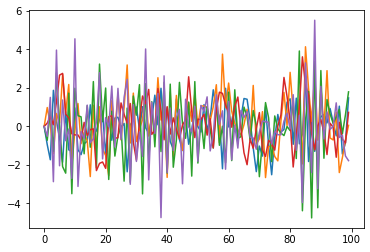

[[ 0.    0.51  0.73  0.    0.35]
 [ 0.    0.    0.    0.    0.  ]
 [ 0.   -0.31 -0.66  0.   -0.54]
 [ 0.    0.51 -0.57  0.45  0.  ]
 [ 0.    0.    0.    0.   -0.27]]
Dataset saved with name X_s10_n100_T5__1.


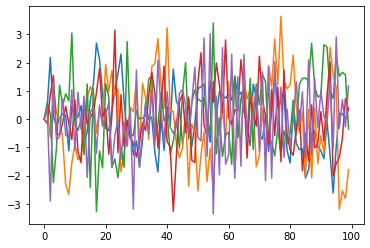

[[ 0.36 -0.46 -0.42  0.65  0.  ]
 [ 0.    0.55 -0.25  0.    0.  ]
 [ 0.    0.    0.    0.    0.  ]
 [ 0.    0.37  0.    0.    0.  ]
 [ 0.   -0.55  0.34  0.   -0.46]]
Dataset saved with name X_s10_n100_T5__2.


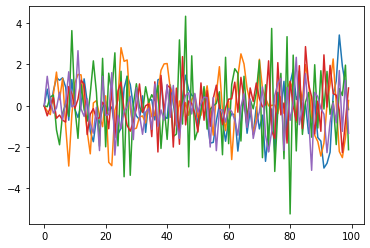

[[ 0.36  0.    0.   -0.33  0.51]
 [ 0.    0.31 -0.67  0.    0.  ]
 [ 0.    0.   -0.65  0.    0.  ]
 [ 0.    0.    0.64 -0.44  0.  ]
 [ 0.    0.   -0.27  0.   -0.39]]
Dataset saved with name X_s10_n100_T5__3.


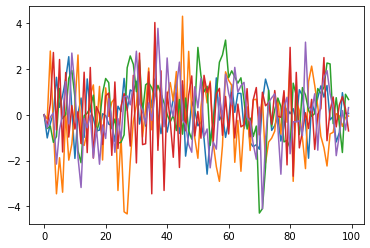

[[ 0.31 -0.56  0.59  0.    0.55]
 [ 0.    0.35  0.    0.    0.  ]
 [ 0.    0.    0.44  0.    0.42]
 [ 0.   -0.73  0.   -0.51  0.  ]
 [ 0.    0.41  0.    0.    0.  ]]
Dataset saved with name X_s10_n100_T5__4.


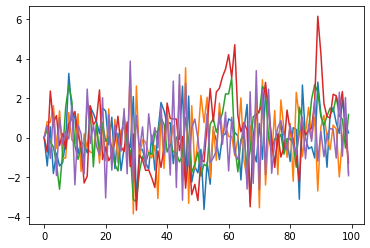

[[ 0.    0.    0.   -0.37  0.  ]
 [ 0.   -0.3   0.    0.    0.  ]
 [ 0.66  0.    0.67  0.6   0.  ]
 [ 0.    0.    0.    0.59  0.  ]
 [ 0.44 -0.58  0.    0.32 -0.64]]
Dataset saved with name X_s10_n100_T5__5.


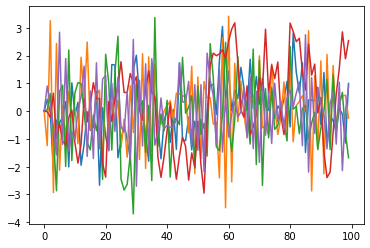

[[ 0.    0.    0.74  0.    0.  ]
 [ 0.   -0.68  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.  ]
 [ 0.27  0.   -0.33  0.72  0.  ]
 [-0.26  0.43  0.51  0.26 -0.51]]
Dataset saved with name X_s10_n100_T5__6.


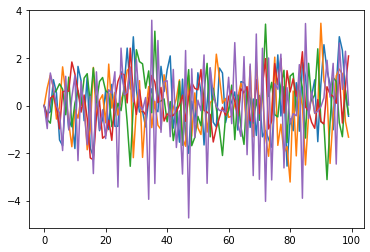

[[ 0.    0.    0.    0.    0.69]
 [ 0.6   0.   -0.43  0.    0.  ]
 [ 0.    0.    0.25  0.    0.  ]
 [ 0.53 -0.51  0.    0.51  0.34]
 [ 0.    0.    0.27  0.   -0.7 ]]
Dataset saved with name X_s10_n100_T5__7.


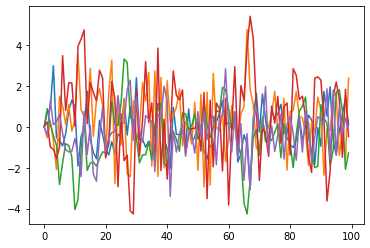

[[ 0.    0.    0.    0.    0.38]
 [ 0.   -0.45  0.    0.7   0.  ]
 [ 0.29 -0.73  0.59 -0.45  0.54]
 [ 0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.64 -0.36]]
Dataset saved with name X_s10_n100_T5__8.


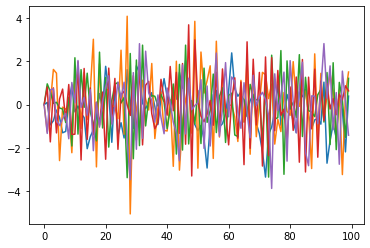

[[ 0.37 -0.61  0.    0.    0.  ]
 [ 0.   -0.41  0.    0.    0.  ]
 [ 0.    0.3  -0.71  0.29  0.71]
 [ 0.   -0.3   0.   -0.66  0.  ]
 [ 0.    0.65  0.    0.    0.  ]]
Dataset saved with name X_s10_n100_T5__9.


In [42]:
# number of files to generate
misc = ""
N = 10

# create directory with n{number variables}_s{number edges}_T{number timesteps}_{misc}
name = f"n{n}_s{s}_T{T}_N_{N}_{misc}/"

path = f"C:/Users/s165048/OneDrive - TU Eindhoven/QuinceyFinalProject/final-project/data/generated_data/{name}"
os.mkdir(path)

for file_number in range(N):
    
    # generate W
    P = np.random.permutation(np.identity(n))
    A = h.generate_A(n, s, tril = False, low = 0.25, high = 0.75) 
    W = P.T @ A @ P
    
    # generate X
    X = h.generate_var_2(T, n, A, P)
    
    # feedback, give W, plot X
    plt.plot(X);
    plt.show()
    
    print(np.round(W, 2))
    
    # Save results
    h.save_data(X, W, "", "", directory = f"/{name}/")